In [13]:
#importing non built-in libraries
import numpy as np
import csv
import matplotlib.pyplot as plt
#stylesheet for matplotlib
import matplotlib.patheffects as path_effects

In [14]:
###Used to tackle the issue of commas in dataset values
#dataset1 (polytechnic intake, enrolment and graduation count)
filename1="./original_dataset/poly_intake_enrolment_grad_count.csv"

#new formatted file1
newfp1 = "./processed_dataset/formatted_poly_intake_enrolment_grad.txt"

#open file for writing, truncate first, returns a file object
fCsv = open(newfp1, "w", encoding="UTF-8", newline="")

#replacing comma-separated values with "|" separated values
writer1 = csv.writer(fCsv, delimiter="|")

#If csvfile is a file object, it should be opened with newline=''
with open(filename1, newline='') as csvfile1:
    #reading original csv file
    #quotechar is a one-character string used to quote fields containing special characters, such as
    #the delimiter, the quotechar or others that contain new-line characters. defaults to '"'
    poly_data2 = csv.reader(csvfile1, delimiter=',', quotechar='"')
    for poly_data in poly_data2:
        #writing each row to a new text file
        writer1.writerow(poly_data)

In [15]:
#Reading the new formatted text file
#names=True: the names will be used to define the field names in a structured dtype
poly_grad_data = np.genfromtxt(newfp1, dtype=['i4','U2', 'U70', 'i8', 'i8', 'i8'], delimiter='|', names=True)
print(f'This is the original dataset:')
print(poly_grad_data[:6])
print()

#Print out total rows and columns of data in the file
noOfRows = len(poly_grad_data[:])
noOfCols = len(poly_grad_data[:][0])
print(f'There are altogether {noOfRows} rows and {noOfCols} columns in the newly formatted data file ({newfp1[2:]})\n')

#Print names of columns and their data types
print("The names of these columns and their data types are:")
for names in poly_grad_data.dtype.names:
    print(f"- {names} {type(poly_grad_data[names][0])}")
print()

#Number of unique values
for unique in poly_grad_data.dtype.names:
    unique_values=np.unique(poly_grad_data[unique])
    print(f'{len(unique_values)} unique values in {unique} column')
print()

#Extract unique values from the year column
unique_yrs=poly_grad_data['year']
unique_yrs=np.unique(unique_yrs)
print(f"There are {len(unique_yrs)} years of data, from {unique_yrs[0]} to {unique_yrs[-1]}\n")

#Extract unique values from the course column
unique_courses=poly_grad_data['course']
unique_courses=np.unique(unique_courses)
print(f"There are {len(unique_courses)} courses: ")
for course in unique_courses:
    print(f"- {course}")
print()

#Extract unique values from the sex column
unique_sex=poly_grad_data['sex']
unique_sex=np.unique(unique_sex)
print(f"Sex is classified in {len(unique_sex)} categories, both {unique_sex[0]} and {unique_sex[1]}\n")

#Copy the original dataset based on gender only
poly_grad_data2=np.copy(poly_grad_data)

#Cleaning data to show info of total sex for each course
female_gender=poly_grad_data2["sex"]=="F"
poly_grad_data2=np.delete(poly_grad_data2, female_gender)
print(f"This is the cleaned version of poly dataset:\n{poly_grad_data2[:6]}\n")

This is the original dataset:
[(2005, 'MF', 'Applied Arts', 1128,  2593,  550)
 (2005, 'F', 'Applied Arts',  687,  1538,  302)
 (2005, 'MF', 'Architecture, Building & Real Estate',  515,  1466,  425)
 (2005, 'F', 'Architecture, Building & Real Estate',  312,   870,  249)
 (2005, 'MF', 'Business & Administration', 3483, 10143, 3044)
 (2005, 'F', 'Business & Administration', 2389,  7038, 2270)]

There are altogether 384 rows and 6 columns in the newly formatted data file (processed_dataset/formatted_poly_intake_enrolment_grad.txt)

The names of these columns and their data types are:
- year <class 'numpy.int32'>
- sex <class 'numpy.str_'>
- course <class 'numpy.str_'>
- intake <class 'numpy.int64'>
- enrolment <class 'numpy.int64'>
- graduates <class 'numpy.int64'>

16 unique values in year column
2 unique values in sex column
13 unique values in course column
347 unique values in intake column
371 unique values in enrolment column
345 unique values in graduates column

There are 16 year

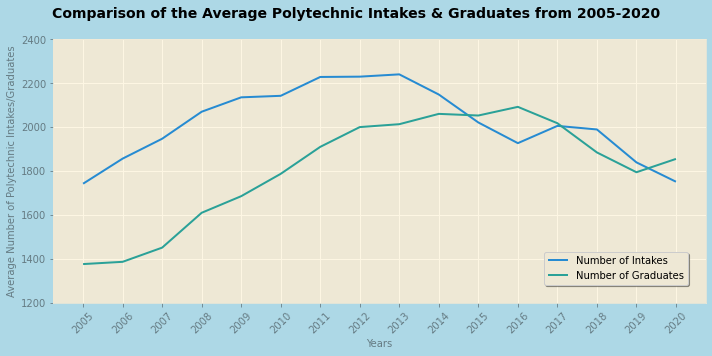

In [16]:
#Re-extract unique values from years columns
unique_yrs=poly_grad_data2['year']
unique_yrs=np.unique(unique_yrs)
polyIntake=[]
polyGrad=[]
polyYrs=[]
polyEnrol=[]

#Extract useful information that matches each unique year and find mean of intakes, grads, and enrolment according to their respective years
for unique_yr in unique_yrs:
    years=poly_grad_data2[poly_grad_data2["year"]==unique_yr]
    #round each of the mean values to 2 d.p.
    meanOfIntake_yr=round(years['intake'].mean(axis=0),2)
    meanOfGrad_yr=round(years['graduates'].mean(axis=0),2)
    meanOfEnrol_yr=round(years['enrolment'].mean(axis=0),2)
    #append each of the values to the python list
    polyYrs.append(unique_yr)
    polyIntake.append(meanOfIntake_yr)
    polyGrad.append(meanOfGrad_yr)
    polyEnrol.append(meanOfEnrol_yr)

#Converts python list to numpy array
polyYrs=np.asarray(polyYrs)
polyIntake=np.asarray(polyIntake)
polyGrad=np.asarray(polyGrad)
polyEnrol=np.asarray(polyEnrol)
#Line Graph (Comparing Intakes VS Graduates Across 2005-2020)
#Stating figure size
fig1=plt.figure(figsize=(10,5))
#Stating subplot figure 1, row 1, column 1
ax1=plt.subplot(111)
#Use a stylesheet for the graph
plt.style.use('Solarize_Light2')
#set a background color for the graph
fig1.set_facecolor("lightblue")
#plot a multi-line graph
ax1.plot(polyIntake, label='Number of Intakes')
ax1.plot(polyGrad, label='Number of Graduates')
#plot the scale of x-axis
ax1.set_xticks(np.arange(len(polyYrs)))
#labels for x-axis
ax1.set_xticklabels(polyYrs, rotation=45)
#insert the legend, position at fixed position
legend = ax1.legend(loc='lower right', shadow=True, fancybox=True, bbox_to_anchor=(0.98, 0.05))
plt.xlabel("Years", fontsize=10)
plt.ylabel("Average Number of Polytechnic Intakes/Graduates", fontsize=10)
fig1.suptitle('Comparison of the Average Polytechnic Intakes & Graduates from 2005-2020', fontsize=14, fontweight='bold')
#plot scale for y-axis
plt.ylim(1200,2400)
plt.tight_layout()
plt.show()


In [17]:
#dataset2 (university intake, enrolment and graduation count)
filename2="./original_dataset/uni_intake_enrolment_grad.csv"

#new formatted file2
newfp2 = "./processed_dataset/formatted_uni_intake_enrolment_grad.txt"

#open file for writing, truncate first
fCsv = open(newfp2, "w", encoding="UTF-8", newline="")

#replacing comma-separated values with "|" separated values
writer2 = csv.writer(fCsv, delimiter="|")

with open(filename2, newline='') as csvfile2:
    #reading original csv file
    uni_data2 = csv.reader(csvfile2, delimiter=',', quotechar='"')
    for uni_data in uni_data2:
        #writing each row to a new text file
        writer2.writerow(uni_data)

In [18]:
#Reading the new formatted text file
uni_grad_data = np.genfromtxt(newfp2, dtype=['i4','U2', 'U70', 'i8', 'i8', 'i8'], delimiter='|', names=True)
print(f'This is the original dataset2:')
print(uni_grad_data[:6])
print()

#Print out total rows and columns of data in the file
noOfRows = len(uni_grad_data[:])
noOfCols = len(uni_grad_data[:][0])
print(f'There are altogether {noOfRows} rows and {noOfCols} columns in the newly formatted data file ({newfp2[2:]})\n')

#Print names of columns and their data types
print("The names of these columns and their data types are:")
for names in uni_grad_data.dtype.names:
    print(f"- {names} {type(uni_grad_data[names][0])}")
print()

#Number of unique values
for unique in uni_grad_data.dtype.names:
    unique_values=np.unique(uni_grad_data[unique])
    print(f'{len(unique_values)} unique values in {unique} column')
print()

#Extract unique values from the year column
unique_yrs=uni_grad_data['year']
unique_yrs=np.unique(unique_yrs)
print(f"There are {len(unique_yrs)} years of data, from {unique_yrs[0]} to {unique_yrs[-1]}\n")

#Extract unique values from the course column
unique_courses=uni_grad_data['course']
unique_courses=np.unique(unique_courses)
print(f"There are {len(unique_courses)} courses: ")
for course in unique_courses:
    print(f"- {course}")
print()

#Extract unique values from the sex column
unique_sex=uni_grad_data['sex']
unique_sex=np.unique(unique_sex)
print(f"Sex is classified in {len(unique_sex)} categories, both {unique_sex[0]} and {unique_sex[1]}")

This is the original dataset2:
[(2005, 'MF', 'Accountancy',  876, 2561,  706)
 (2005, 'F', 'Accountancy',  530, 1732,  495)
 (2005, 'MF', 'Architecture, Building & Real Estate',  299, 1310,  180)
 (2005, 'F', 'Architecture, Building & Real Estate',  175,  786,  106)
 (2005, 'MF', 'Business & Administration', 1545, 5013, 1256)
 (2005, 'F', 'Business & Administration',  901, 3098,  898)]

There are altogether 480 rows and 6 columns in the newly formatted data file (processed_dataset/formatted_uni_intake_enrolment_grad.txt)

The names of these columns and their data types are:
- year <class 'numpy.int32'>
- sex <class 'numpy.str_'>
- course <class 'numpy.str_'>
- intake <class 'numpy.int64'>
- enrolment <class 'numpy.int64'>
- graduates <class 'numpy.int64'>

16 unique values in year column
2 unique values in sex column
16 unique values in course column
376 unique values in intake column
445 unique values in enrolment column
385 unique values in graduates column

There are 16 years of dat

In [19]:
#Copy the original dataset based on gender only
uni_grad_data2=np.copy(uni_grad_data)

#Extracting data only for total sex for each year and course
female_gender=uni_grad_data2["sex"]=="F"
uni_grad_data2=np.delete(uni_grad_data2, female_gender)
print(f"This shows the total number of intakes, students currently enroling and graduates for each year and course:\n{uni_grad_data2[:6]}\n")

#Re-extract unique values from course columns
unique_courses=uni_grad_data2['course']
unique_courses=np.unique(unique_courses)

#Extract useful information that matches each unique course and find sum of intakes, grads
#and enrolment according to their respective course, append them into one python list
unigradData_uniqueSum=[]
for unique_course in unique_courses:
    location=uni_grad_data2[uni_grad_data2["course"]==unique_course]
    sumOfIntake_course=location['intake'].sum()
    sumOfEnrol_course=location['enrolment'].sum()
    sumOfGrad_course=location['graduates'].sum()
    unigradData_uniqueSum.append((unique_course, sumOfIntake_course, sumOfEnrol_course, sumOfGrad_course))

#Converts python list to numpy array
unigradData_sum=np.asarray(unigradData_uniqueSum)
print(f"Sum of all the university students intake, enrolment and graduates from for each course: \n{unigradData_sum}\n")

#Extract useful information that matches each unique course and find mean of intakes, grads
#and enrolment according to their respective courses, append them into one python list
meanOf_UniGradData_Course=[]
for unique_course in unique_courses:
    location=uni_grad_data2[uni_grad_data2["course"]==unique_course]
    meanOfIntake_course=location['intake'].mean(axis=0)
    meanOfEnrol_course=location['enrolment'].mean(axis=0)
    meanOfGrad_course=location['graduates'].mean(axis=0)
    meanOf_UniGradData_Course.append((unique_course, meanOfIntake_course, meanOfEnrol_course, meanOfGrad_course))

#Converts python list to numpy array
unigradData_mean=np.asarray(meanOf_UniGradData_Course)

#Shows the average max intake and the course that matches requirement (mean)
maxIntakeMeanCourse=unigradData_mean[:,1].astype(float).max()
maxIntakeMeanCourseIndex=unigradData_mean[:,1].astype(float).argmax()
maxIntakeCourse=unigradData_mean[maxIntakeMeanCourseIndex,0]
print(f"Course with the highest mean number of intakes from 2005-2020: {maxIntakeCourse}")
print(f"Max mean number of intakes: {maxIntakeMeanCourse:.2f}")

#Shows the average min intake and the course that matches requirement (mean)
minIntakeMeanCourse=unigradData_mean[:,1].astype(float).min()
minIntakeMeanCourseIndex=unigradData_mean[:,1].astype(float).argmin()
minIntakeCourse=unigradData_mean[minIntakeMeanCourseIndex,0]
print(f"Course with the lowest mean number of intakes from 2005-2020: {minIntakeCourse}")
print(f"Min mean number of intakes: {minIntakeMeanCourse:.2f}\n")

#Shows the average max enrolment and the course that matches requirement (mean)
maxEnrolmentMeanCourse=unigradData_mean[:,2].astype(float).max()
maxEnrolmentMeanCourseIndex=unigradData_mean[:,2].astype(float).argmax()
maxEnrolmentCourse=unigradData_mean[maxEnrolmentMeanCourseIndex,0]
print(f"Course with the highest mean number of enrolment from 2005-2020: {maxEnrolmentCourse}")
print(f"Max mean number of enrolment: {maxEnrolmentMeanCourse:.2f}")

#Shows the average min enrolment and the course that matches requirement (mean)
minEnrolmentMeanCourse=unigradData_mean[:,2].astype(float).min()
minEnrolmentMeanCourseIndex=unigradData_mean[:,2].astype(float).argmin()
minEnrolmentCourse=unigradData_mean[minEnrolmentMeanCourseIndex,0]
print(f"Course with the lowest mean number of enrolment from 2005-2020: {minEnrolmentCourse}")
print(f"Min mean number of enrolment: {minEnrolmentMeanCourse:.2f}\n")

#Shows the average max number of graduates and the course that matches requirement (mean)
maxGradMeanCourse=unigradData_mean[:,3].astype(float).max()
maxGradMeanCourseIndex=unigradData_mean[:,3].astype(float).argmax()
maxGradCourse=unigradData_mean[maxGradMeanCourseIndex,0]
print(f"Course with the highest mean number of graduates from 2005-2020: {maxGradCourse}")
print(f"Max mean number of graduates: {maxGradMeanCourse:.2f}")

#Shows the average min number of graduates and the course that matches requirement (mean)
minGradMeanCourse=unigradData_mean[:,3].astype(float).min()
minGradMeanCourseIndex=unigradData_mean[:,3].astype(float).argmin()
minGradCourse=unigradData_mean[minGradMeanCourseIndex,0]
print(f"Course with the lowest mean number of graduates from 2005-2020: {minGradCourse}")
print(f"Min mean number of graduates: {minGradMeanCourse:.2f}")

This shows the total number of intakes, students currently enroling and graduates for each year and course:
[(2005, 'MF', 'Accountancy',  876,  2561,  706)
 (2005, 'MF', 'Architecture, Building & Real Estate',  299,  1310,  180)
 (2005, 'MF', 'Business & Administration', 1545,  5013, 1256)
 (2005, 'MF', 'Dentistry',   33,   139,   34)
 (2005, 'MF', 'Education',    0,     0,    0)
 (2005, 'MF', 'Engineering Sciences', 4028, 16599, 3859)]

Sum of all the university students intake, enrolment and graduates from for each course: 
[['Accountancy' '19910' '65384' '16514']
 ['Architecture, Building & Real Estate' '6868' '28663' '6146']
 ['Business & Administration' '32745' '111254' '25433']
 ['Dentistry' '820' '3147' '702']
 ['Education' '2704' '9807' '3723']
 ['Engineering Sciences' '73150' '262842' '66302']
 ['Fine & Applied Arts' '5838' '19658' '4276']
 ['Health Sciences' '8765' '24929' '5417']
 ['Humanities & Social Sciences' '46770' '171567' '37870']
 ['Information Technology' '21204' '7

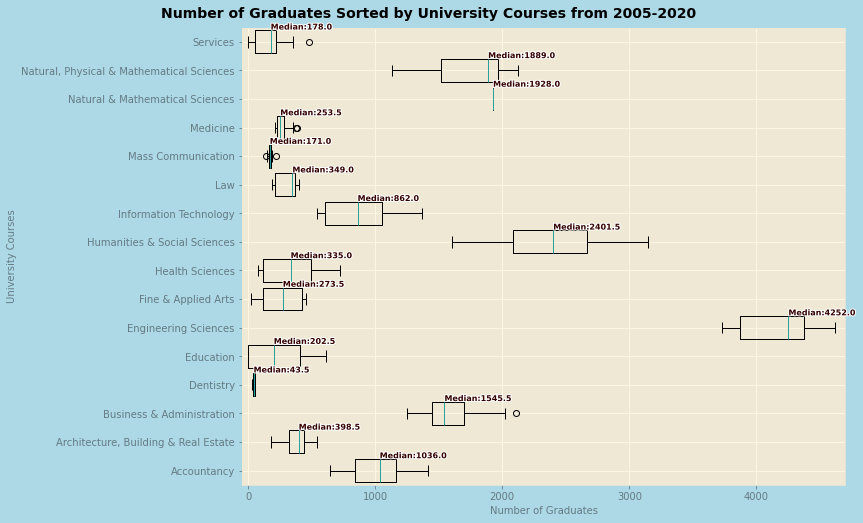

In [20]:
#Extracting out each unique course and stores the number of graduates from 2005-2020
uniGrad=[]
uniCourse=[]
for unique_course in unique_courses:
    location=uni_grad_data2[uni_grad_data2["course"]==unique_course]
    uniGrad.append((location['graduates']))
    uniCourse.append(unique_course)

#Converts python list to numpy array
uniGrad=np.asarray(uniGrad, dtype=object)
uniCourse=np.asarray(uniCourse)

#Plotting boxplot (Number of Uni Graduates for Each Course)
fig2=plt.figure(1,figsize=(12,14))
fig2.set_facecolor("lightblue")
ax2=plt.subplot(211)
#Plotting scale range for x-axis
ax2.set_xlim(-50,4700)
boxplot1 = ax2.boxplot(uniGrad, labels=uniCourse,vert=False, widths=0.8)
#Increase margin on top of subplots
plt.subplots_adjust(top=1)
plt.xlabel("Number of Graduates", fontsize=10)
plt.ylabel("University Courses", fontsize=10)
fig2.suptitle('Number of Graduates Sorted by University Courses from 2005-2020', fontsize=14, fontweight='bold')

for line in boxplot1['medians']:
    #Get position data for top of median line
    x, y = line.get_xydata()[1]
    #Overlay median value 1d.p. based on position value x,y
    text= plt.text(x+0.05, y+0.03, f'Median:{x:.1f}', fontsize=8, fontfamily='sans-serif', color='#330000', fontweight='semibold')
    #Use matplotlib style sheet for different colour of text-stroke
    text.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),path_effects.Normal()])

plt.tight_layout()
plt.show()

In [21]:
###Extract useful information that matches each course and find the median number for graduates
medianOf_UniGradData_Course=[]
for unique_course in unique_courses:
    location=uni_grad_data2[uni_grad_data2["course"]==unique_course]
    medianOfGrad_course=np.median(location['graduates'],axis=0)
    medianOf_UniGradData_Course.append((unique_course, medianOfGrad_course))

#Converts python list to numpy array
unigradData_median=np.asarray(medianOf_UniGradData_Course)

#Prints median of graduates in all course
print("Median:")
for unigradData_printMedian in unigradData_median:
    print(f"{unigradData_printMedian[0]}: {unigradData_printMedian[1].astype(float):.1f}")
print()

#Shows the average max number of graduates and the course that matches requirement (median)
maxGradMedianCourse=unigradData_median[:,1].astype(float).max()
maxGradMedianCourseIndex=unigradData_median[:,1].astype(float).argmax()
maxMedian=unigradData_median[maxGradMedianCourseIndex,0]
print(f"Course with highest median: {maxMedian}")
print(f"Highest median: {maxGradMedianCourse:.1f}")

#Shows the average min number of graduates and the course that matches requirement (median)
minGradMedianCourse=unigradData_median[:,1].astype(float).min()
minGradMedianCourseIndex=unigradData_median[:,1].astype(float).argmin()
minMedian=unigradData_median[minGradMedianCourseIndex,0]
print(f"Course with lowest median: {minMedian}")
print(f"Lowest median: {minGradMedianCourse:.1f}\n")

###Extract useful information that matches each course and find the standard deviation for graduates
stdOf_UniGradData_Course=[]
for unique_course in unique_courses:
    location=uni_grad_data2[uni_grad_data2["course"]==unique_course]
    stdOfGrad_course=np.std(location['graduates'],axis=0)
    stdOf_UniGradData_Course.append((unique_course, stdOfGrad_course))

#Converts python list to numpy array
unigradData_std=np.asarray(stdOf_UniGradData_Course)

##Prints standard deviation of graduates in all course
print("Standard Deviation:")
for unigradData_printstd in unigradData_std:
    print(f"{unigradData_printstd[0]}: {unigradData_printstd[1].astype(float):.2f}")
print()

#Shows the largest SD of graduates and the course that has it
maxGradSDCourse=unigradData_std[:,1].astype(float).max()
maxGradSDCourseIndex=unigradData_std[:,1].astype(float).argmax()
maxSTD=unigradData_std[maxGradSDCourseIndex,0]
print(f"Course with largest standard deviation: {maxSTD}")
print(f"Largest standard deviation: {maxGradSDCourse:.2f}")

#Shows the smallest SD of graduates and the course that has it
minGradSDCourse=unigradData_std[:,1].astype(float).min()
minGradSDCourseIndex=unigradData_std[:,1].astype(float).argmin()
minSTD=unigradData_std[minGradSDCourseIndex,0]
print(f"Course with smallest standard deviation: {minSTD}")
print(f"Smallest standard deviation: {minGradSDCourse:.2f}")

Median:
Accountancy: 1036.0
Architecture, Building & Real Estate: 398.5
Business & Administration: 1545.5
Dentistry: 43.5
Education: 202.5
Engineering Sciences: 4252.0
Fine & Applied Arts: 273.5
Health Sciences: 335.0
Humanities & Social Sciences: 2401.5
Information Technology: 862.0
Law: 349.0
Mass Communication: 171.0
Medicine: 253.5
Natural & Mathematical Sciences: 1928.0
Natural, Physical & Mathematical Sciences: 1889.0
Services: 178.0

Course with highest median: Engineering Sciences
Highest median: 4252.0
Course with lowest median: Dentistry
Lowest median: 43.5

Standard Deviation:
Accountancy: 228.19
Architecture, Building & Real Estate: 94.61
Business & Administration: 240.11
Dentistry: 8.14
Education: 218.72
Engineering Sciences: 288.83
Fine & Applied Arts: 157.06
Health Sciences: 204.29
Humanities & Social Sciences: 474.15
Information Technology: 261.68
Law: 78.69
Mass Communication: 17.04
Medicine: 54.37
Natural & Mathematical Sciences: 0.00
Natural, Physical & Mathematical 

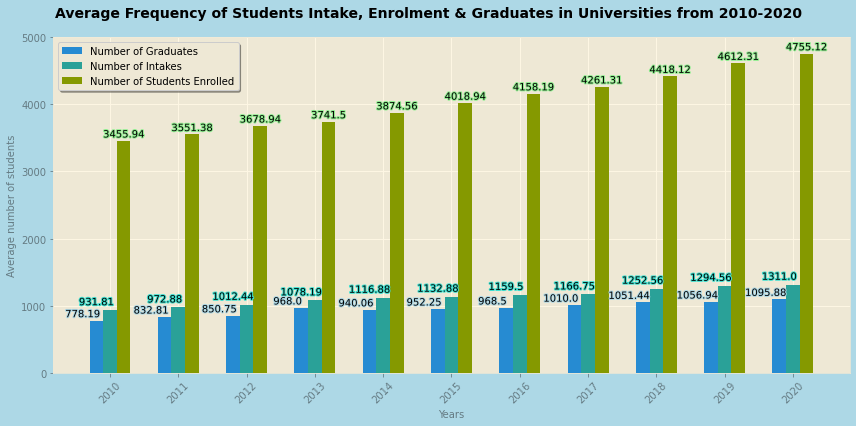

In [22]:
#Re-extract unique values from course columns
unique_courses=uni_grad_data2['course']
unique_courses=np.unique(unique_courses)

#Extract unique values from years columns
unique_yrs=uni_grad_data2['year']
unique_yrs=np.unique(unique_yrs)
uniEnrolData_yr=[]
uniIntakeData_yr=[]
uniGradData_yr=[]

#List of years from 2010-2020
uniYr=[i for i in range(2010,2021)]
#Extract average number of students enrolled in university from 2010-2020
for unique_yr in uniYr:
    years=uni_grad_data2[uni_grad_data2["year"]==unique_yr]
    #Average number of people per course for each year
    avgOfEnrol_yr=round(years['enrolment'].sum()/len(unique_courses),2)
    avgOfIntake_yr=round(years['intake'].sum()/len(unique_courses),2)
    avgOfGrads_yr=round(years['graduates'].sum()/len(unique_courses),2)
    uniEnrolData_yr.append(avgOfEnrol_yr)
    uniIntakeData_yr.append(avgOfIntake_yr)
    uniGradData_yr.append(avgOfGrads_yr)

#Converts python list to numpy array
uniEnrolData_yr=np.asarray(uniEnrolData_yr)
uniIntakeData_yr=np.asarray(uniIntakeData_yr)
uniGradData_yr=np.asarray(uniGradData_yr)
uniYr=np.asarray(uniYr)

#Plotting bar chart (Uni Students who are enrolled from 2014-2020)
#set position of bars on the x-axis
yr_count=np.arange(len(uniYr))
fig3=plt.figure(1,figsize=(12,6))
fig3.set_facecolor("lightblue")
ax3=plt.subplot(111)
#Plot each bar in the bargraph
ax3.bar(yr_count-0.2, uniGradData_yr, label='Number of Graduates', width=0.2)
ax3.bar(yr_count, uniIntakeData_yr, label='Number of Intakes', width=0.2)
ax3.bar(yr_count+0.2, uniEnrolData_yr, label='Number of Students Enrolled', width=0.2)

#Set labels for x-axis
ax3.set_xticks(yr_count)
ax3.set_xticklabels(uniYr, rotation=45)
legend = ax3.legend(loc='upper left', shadow=True, fancybox=True)
plt.xlabel("Years", fontsize=10)
plt.ylabel("Average number of students", fontsize=10)
fig3.suptitle('Average Frequency of Students Intake, Enrolment & Graduates in Universities from 2010-2020', fontsize=14, fontweight='bold')
#plot range for scale of y-axis
plt.ylim(0,5000)

#Annotation for bar chart
for i in yr_count:
    #Annotating values of each bar with a fixed position
    annotate=ax3.annotate(uniEnrolData_yr[i], (yr_count[i]+0.2,uniEnrolData_yr[i]+50), color='black', ha= 'center')
    annotate2=ax3.annotate(uniIntakeData_yr[i], (yr_count[i]-0.2,uniIntakeData_yr[i]+75), color='black', ha= 'center')
    annotate3=ax3.annotate(uniGradData_yr[i], (yr_count[i]-0.4,uniGradData_yr[i]+50), color='black', ha= 'center')
    #Use matplotlib style sheet for a font background
    annotate.set_path_effects([path_effects.Stroke(linewidth=2, foreground='lightgreen'),path_effects.Normal()])
    annotate2.set_path_effects([path_effects.Stroke(linewidth=2, foreground='turquoise'),path_effects.Normal()])
    annotate3.set_path_effects([path_effects.Stroke(linewidth=2, foreground='lightblue'),path_effects.Normal()])
plt.tight_layout()
plt.show()

In [23]:
#dataset3 (proportion of university students who are employed and fully employed, median gross month salary from year 2019-2021)
filename3="./original_dataset/uni_grads_employment_salary_figs.csv"

#new formatted file2
newfp3 = "./processed_dataset/formatted_uniGrads_employment_salary_figs.txt"

#open file for writing, truncate first
fCsv = open(newfp3, "w", encoding="UTF-8", newline="")

#replacing comma-separated values with "|" separated values
writer3 = csv.writer(fCsv, delimiter="|")

with open(filename3, newline='') as csvfile3:
    #reading original csv file
    salary_data2 = csv.reader(csvfile3, delimiter=',', quotechar='"')
    for salary_data in salary_data2:
        #writing each row to a new text file
        writer3.writerow(salary_data)

In [24]:
#Reading the new formatted text file
salary_data = np.genfromtxt(newfp3, dtype=['i4', 'U70', 'f4', 'f4', 'i4'], delimiter='|', names=True, missing_values=[''],filling_values=0)
print(f'This is the original dataset3:')
print(salary_data[:9])
print()

#Print out total rows and columns of data in the file
noOfRows = len(salary_data[:])
noOfCols = len(salary_data[:][0])
print(f'There are altogether {noOfRows} rows and {noOfCols} columns in the newly formatted data file ({newfp3[2:]})\n')

#Print names of columns and their data types
print("The names of these columns and their data types are:")
for names in salary_data.dtype.names:
    print(f"- {names} {type(salary_data[names][0])}")
print()

#Number of unique values
for unique in salary_data.dtype.names:
    unique_values=np.unique(salary_data[unique])
    print(f'{len(unique_values)} unique values in {unique} column')
print()

#Extract unique values from the year column
unique_yrs=salary_data['year']
unique_yrs=np.unique(unique_yrs)
print(f"There are {len(unique_yrs)} years of data, from {unique_yrs[0]} to {unique_yrs[-1]}\n")

#Extract unique values from the course_cluster column
unique_courseCluster=salary_data['course_cluster']
unique_courseCluster=np.unique(unique_courseCluster)
print(f"There are {len(unique_courseCluster)} courses: ")
for course in unique_courseCluster:
    print(f"- {course}")
print()

This is the original dataset3:
[(2019, 'Arts, Design & Media', 0.873, 0.624, 3200)
 (2019, 'Built Environment', 0.926, 0.873, 3500)
 (2019, 'Business', 0.946, 0.888, 3500)
 (2019, 'Engineering', 0.884, 0.833, 3750)
 (2019, 'Health Sciences', 0.971, 0.884, 3500)
 (2019, 'Humanities & Social Sciences', 0.88 , 0.745, 3500)
 (2019, 'Information & Digital Technologies', 0.954, 0.927, 4400)
 (2019, 'Sciences', 0.869, 0.715, 3500)
 (2019, 'Others (Not Working)', 0.093, 0.183,    0)]

There are altogether 27 rows and 5 columns in the newly formatted data file (processed_dataset/formatted_uniGrads_employment_salary_figs.txt)

The names of these columns and their data types are:
- year <class 'numpy.int32'>
- course_cluster <class 'numpy.str_'>
- employed <class 'numpy.float32'>
- full_time_employed <class 'numpy.float32'>
- gross_median_monthly_salary <class 'numpy.int32'>

3 unique values in year column
9 unique values in course_cluster column
26 unique values in employed column
25 unique valu

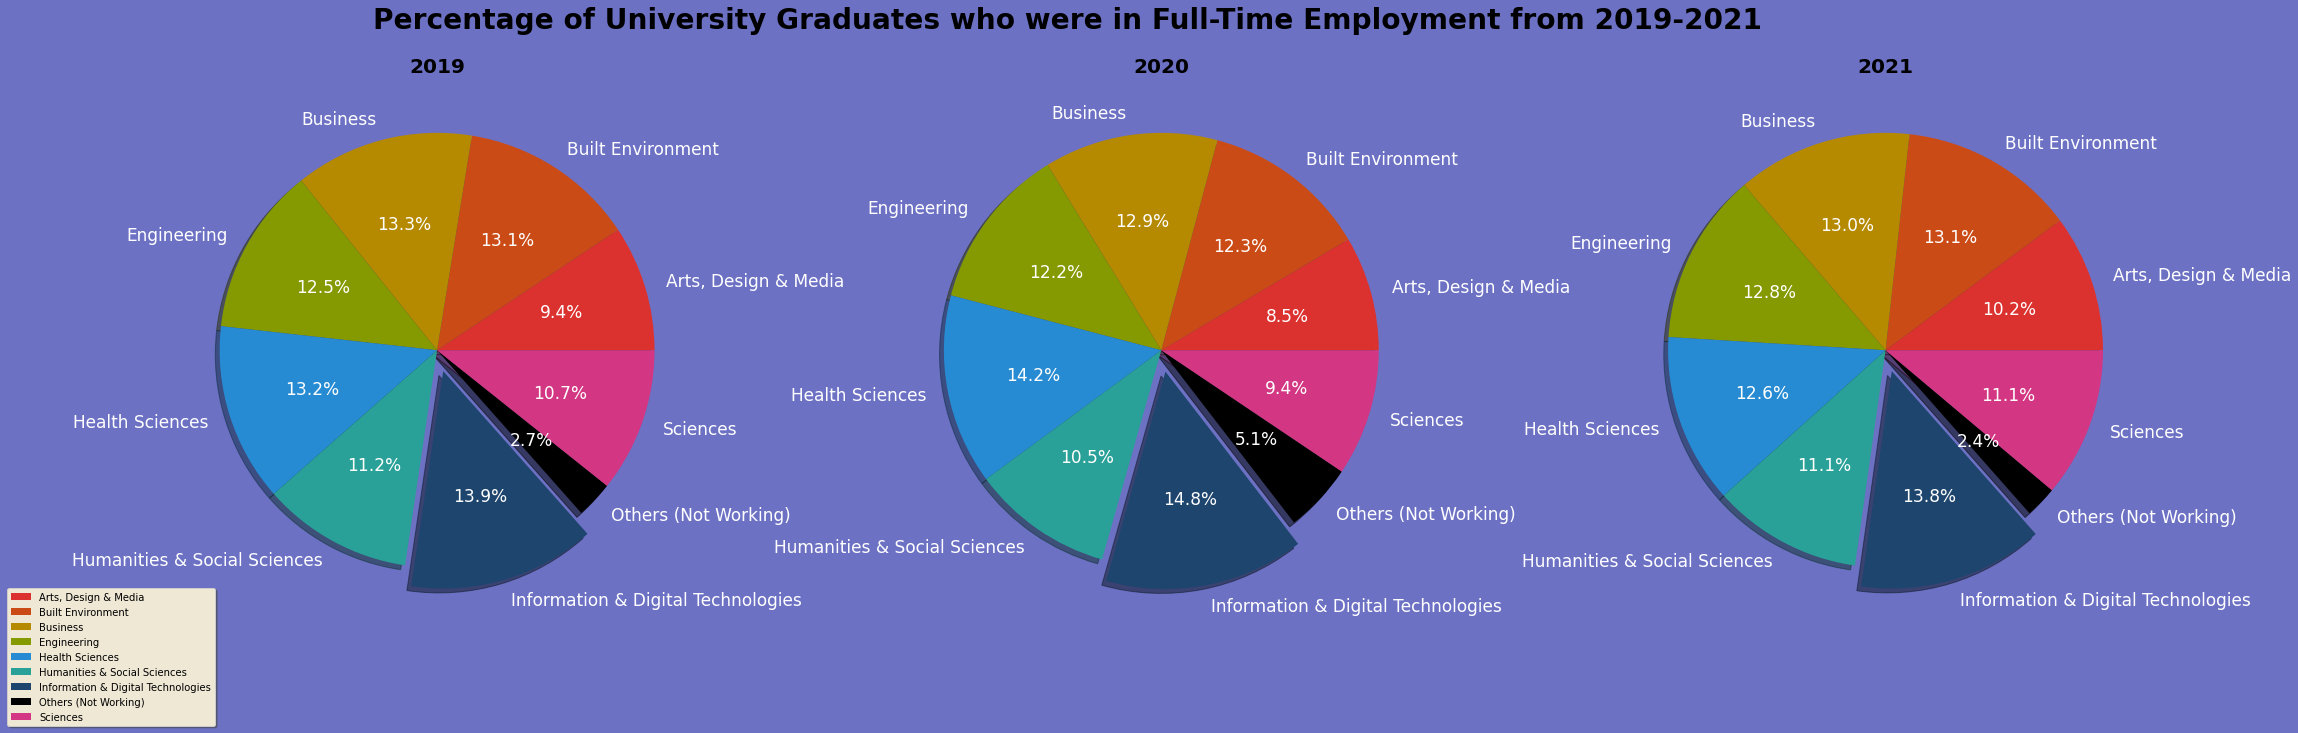

In [25]:
#Copy the original dataset
salary_data2=np.copy(salary_data)

#Re-extract unique values from course columns
unique_courses=salary_data2['course_cluster']
unique_courses=np.unique(unique_courses)

###Extract useful information that matches each course and append each proportion full-time employed person to each list
salary_data2019=[]
salary_data2020=[]
salary_data2021=[]
salaryCourses=[]
for unique_course in unique_courses:
    location=salary_data2[salary_data2["course_cluster"]==unique_course]
    salary_data2019.append(location['full_time_employed'][0])
    salary_data2020.append(location['full_time_employed'][1])
    salary_data2021.append(location['full_time_employed'][2])
    salaryCourses.append(unique_course)

#Converts python list to numpy array
salaryCourses=np.asarray(salaryCourses)
salary_data2019=np.asarray(salary_data2019)
salary_data2020=np.asarray(salary_data2020)
salary_data2021=np.asarray(salary_data2021)

#Plotting a pie chart (Proportion of employed for each course from 2019-2021)
fig4=plt.figure(1,figsize=(12,10))
fig4.set_facecolor("#6c71c4")
#Explode 1 part of the pie chart
explode = (0, 0, 0, 0, 0,0,0.1,0,0)
colors = ['#dc322f', '#cb4b16', '#b58900', '#859900','#268bd2','#2aa198','#1E456E','black','#d33682']
#Increase margin to the right of each subplot
plt.subplots_adjust(right=2.5)
#Subplot 1 row, 3 columns and figure 1
ax4_1=plt.subplot(131)
ax4_1.pie(salary_data2019, explode=explode, colors=colors, labels=salaryCourses, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 17, 'color':'white'})
#Subplot 1 row, 3 columns and figure 2
ax4_2=plt.subplot(132)
ax4_2.pie(salary_data2020, explode=explode, colors=colors, labels=salaryCourses, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 17, 'color':'white'})
#Subplot 1 row, 3 columns and figure 3
ax4_3=plt.subplot(133)
ax4_3.pie(salary_data2021, explode=explode, colors=colors, labels=salaryCourses, autopct='%1.1f%%', shadow=True, textprops={'fontsize': 17, 'color':'white'})
legend = ax4_1.legend(loc='lower left', shadow=True, fancybox=True, bbox_to_anchor=(-0.3,-0.2, 5, 0))
fig4.suptitle('Percentage of University Graduates who were in Full-Time Employment from 2019-2021', fontsize=28, fontweight='bold', ha='left', x=0.4)
ax4_1.set_title('2019', fontweight='heavy', fontsize=20)
ax4_2.set_title('2020', fontweight='heavy', fontsize=20)
ax4_3.set_title('2021', fontweight='heavy', fontsize=20)
plt.show()

r=0.5494269554142496
As the percentage of graduates who were permanently employed increased, the gross median monthly salary increased, hence shows a positive association.
Since r=0.55, the relationship is only moderate.
There is also some presence of outliers.


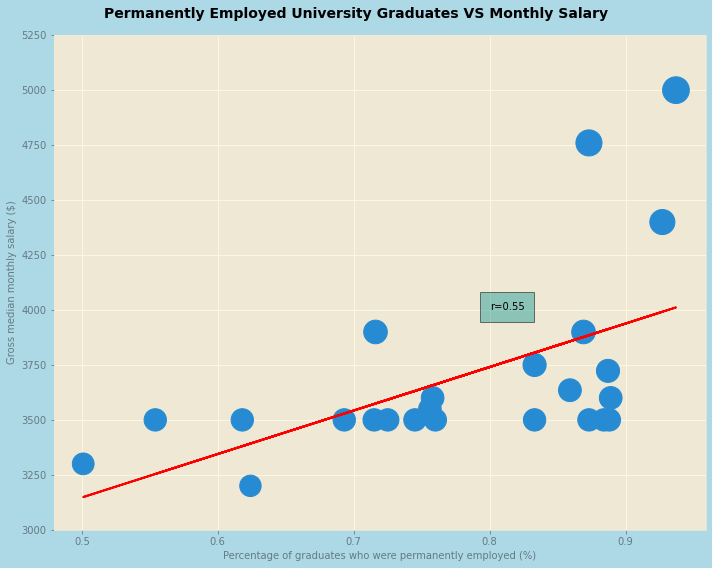

In [26]:
#Re-extract unique values from course columns
unique_courses=salary_data2['course_cluster']
unique_courses=np.unique(unique_courses)

###Extract percentage of university graduates who were in full time employment and their gross 
#median monthly salary
fulltime_percentage=[]
salaryGrossMedian=[]
for unique_course in unique_courses:
    location=salary_data2[salary_data2["course_cluster"]==unique_course]
    #Only interested in the people who are working full time and their salaries
    if unique_course!="Others (Not Working)":
        fulltime_percentage.append(location['full_time_employed'])
        salaryGrossMedian.append(location['gross_median_monthly_salary'])

#Converts python list to numpy array
fulltime_percentage=np.asarray(fulltime_percentage)
salaryGrossMedian=np.asarray(salaryGrossMedian)

#Converts arrays to 1D arrays
fulltime_percentage=fulltime_percentage.flatten()
salaryGrossMedian=salaryGrossMedian.flatten()

#Plots scatterplot (Finds the relationship of percentage of fully-employed university graduates and gross median monthly salary)
fig5=plt.figure(1,figsize=(10,8))
fig5.set_facecolor("lightblue")
ax5=plt.subplot(111)
#s is the size of the markers
ax5.scatter(fulltime_percentage,salaryGrossMedian, s=salaryGrossMedian/7)
#plot the trend line (Least squares polynomial fit)
#deg = degree of fitting polynomial
m,b = np.polyfit(fulltime_percentage, salaryGrossMedian, deg=1)
ax5.plot(fulltime_percentage, m*fulltime_percentage + b, 'r-')
plt.ylim(3000,5250)

#Find the correlation coefficients
corelation_coeff = np.corrcoef(fulltime_percentage,salaryGrossMedian)[0,1**2]
print(f"r={corelation_coeff}")
print(f"As the percentage of graduates who were permanently employed increased, the gross median monthly salary increased, hence shows a positive association.")
print(f"Since r={corelation_coeff:.2f}, the relationship is only moderate.")
print(f"There is also some presence of outliers.")
string="r="+str(round(corelation_coeff,2))

#Insert text of correlation coefficient with a box as a background
ax5.text(0.8, 4000, string, fontsize=10,bbox={'facecolor':'#2aa198', 'alpha':0.5, 'pad':10})
plt.xlabel("Percentage of graduates who were permanently employed (%)", fontsize=10)
plt.ylabel("Gross median monthly salary ($)", fontsize=10)
fig5.suptitle('Permanently Employed University Graduates VS Monthly Salary', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()